In [2]:
from datetime import datetime

In [3]:
datetime(year=2019, month=8 , day=15)

datetime.datetime(2019, 8, 15, 0, 0)

In [5]:
from dateutil import parser

In [6]:
date = parser.parse("15th of August 2019")
date

datetime.datetime(2019, 8, 15, 0, 0)

In [7]:
date = parser.parse("15th of August, 2019")
date

datetime.datetime(2019, 8, 15, 0, 0)

# Numpy's datetime64

In [8]:
import numpy as np

In [9]:
date = np.array('2019-08-15', dtype=np.datetime64)
date

array('2019-08-15', dtype='datetime64[D]')

In [10]:
date + np.arange(15)

array(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
       '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
       '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26',
       '2019-08-27', '2019-08-28', '2019-08-29'], dtype='datetime64[D]')

In [12]:
np.datetime64('2019-08-15')

numpy.datetime64('2019-08-15')

In [13]:
type(np.datetime64('2019-08-15'))

numpy.datetime64

In [14]:
np.datetime64('2019-08-15 12:00')

numpy.datetime64('2019-08-15T12:00')

In [16]:
np.datetime64('2019-08-15 12:59:59.50', 'ns')

numpy.datetime64('2019-08-15T12:59:59.500000000')

# URL for referring datetime in Numpy

In [ ]:
# https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

# Date and Time in Pandas

In [22]:
import pandas as pd
import numpy as np

In [19]:
date = pd.to_datetime("15th of August, 2019")
date

Timestamp('2019-08-15 00:00:00')

In [20]:
date = pd.to_datetime("15th of August 2019")
date

Timestamp('2019-08-15 00:00:00')

In [21]:
date.strftime('%A')

'Thursday'

In [23]:
date+pd.to_timedelta(np.arange(15), 'D')

DatetimeIndex(['2019-08-15', '2019-08-16', '2019-08-17', '2019-08-18',
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26',
               '2019-08-27', '2019-08-28', '2019-08-29'],
              dtype='datetime64[ns]', freq=None)

## Indexing by Time

In [24]:
index = pd.DatetimeIndex(['2016-08-15','2017-08-15','2018-08-15','2019-08-15'])

data = pd.Series([0,1,2,3], index=index)
print(data)

2016-08-15    0
2017-08-15    1
2018-08-15    2
2019-08-15    3
dtype: int64


In [26]:
data['2017-08-15']

1

In [27]:
data['2017-08-15':'2019-08-15']

2017-08-15    1
2018-08-15    2
2019-08-15    3
dtype: int64

In [28]:
data['2017']

2017-08-15    1
dtype: int64

# Visualize Seattle Bicycle Count

In [29]:
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv',
                  index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [30]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [32]:
data.dropna().describe()

,West,East,Total
count,61287.000000,61287.000000,61287.000000
mean,52.894790,61.444874,114.339664
std,67.815951,89.875981,145.211368
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


## Visualize with matplotlib and seaborn

In [34]:
% matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.set()  # to visualize in jupyter with seaborn

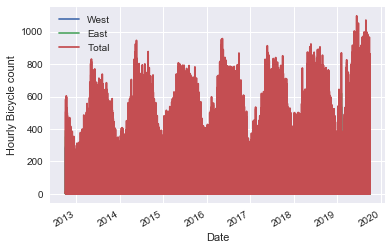

In [35]:
data.plot()
plt.ylabel('Hourly Bicycle count')
plt.show()

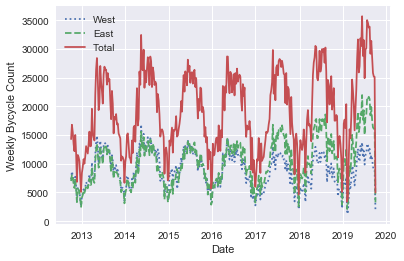

In [36]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel("Weekly Bycycle Count")
plt.show()

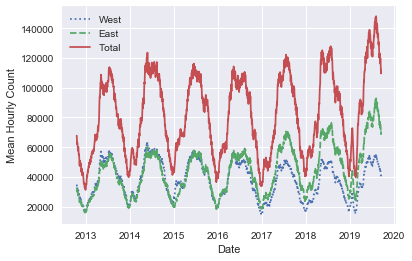

In [38]:
daily = data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel("Mean Hourly Count")
plt.show()

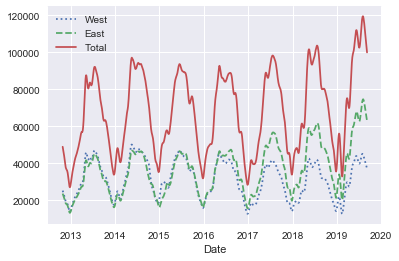

In [39]:
daily.rolling(50,center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.show()

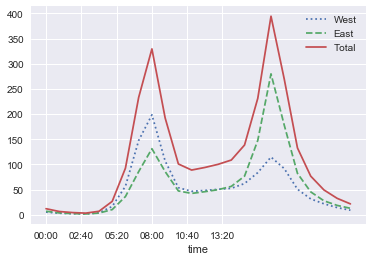

In [42]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 40 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.show()

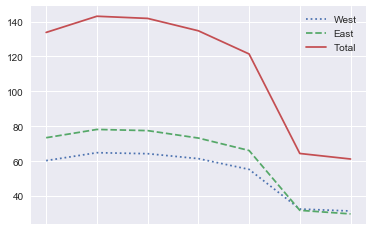

In [43]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])
plt.show()